In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-26 / Aki Taanila


## 2/7 Usean arvosarjan pylväskaaviot

### Tuonnit ja alkuvalmistelut

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely 'whitegrid' sisältää taustaviivoitukset (grid).
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'.
sns.set_style('whitegrid')

### Datan avaaminen

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


### Vaakapylväskaavio

In [4]:
# Eri koulutuksen suorittaneiden lukumäärät sukupuolen mukaan.
df1 = pd.crosstab(df['koulutus'], df['sukup'])

koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.index = koulutus

# n-arvot otsikoihin.
miehet = f'Mies, n = {str(df1[1].sum())}'
naiset = f'Nainen, n = {str(df1[2].sum())}'
sukup = [miehet, naiset]
df1.columns = sukup

df1

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


Dataframen riveistä tulee luokka-akselin luokat/kategoriat (koulutus) ja sarakkeista arvosarjat (sukupuoli). Jos haluat vaihtaa luokka-akselin luokat ja arvosarjat, niin transponoi dataframe **T**-toiminnolla: `df1.T.plot(kind='barh')`.

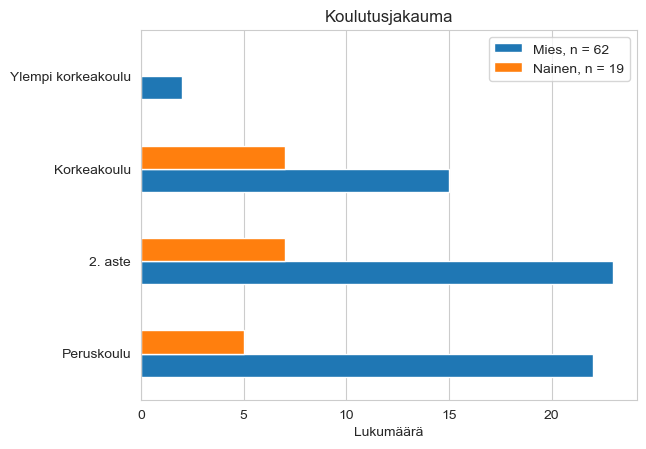

In [5]:
df1.plot(kind='barh')

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

### Hienosäätöä

Parametri **width** muuttaa pylvään paksuutta. Arvo width=0 häivyttää pylväät ja arvo width=1 laittaa pylväät kiinni toisiinsa.

Parametri **legend='reverse'** kääntää selitteen järjestyksen. Käännetty järjestys on tässä tapauksessa havainnollisempi.

Kaaviossa on kaksi arvosarjaa (Mies, Nainen). Tämän vuoksi käytetään **for**-silmukkaa arvosarjojen läpikäyntiin liitettäessä lukuarvoja pylväiden viereen.

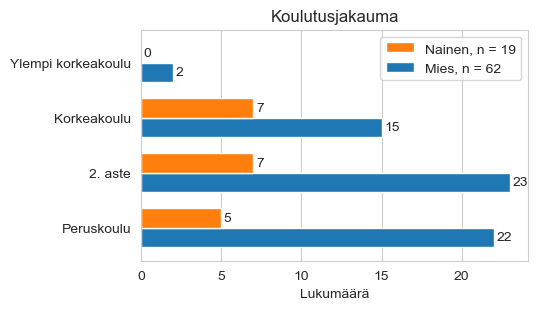

In [6]:
ax = df1.plot(kind='barh', figsize=(5, 3), legend='reverse', width=0.7)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, padding=2)

### Pystypylväskaavio

Pienin muutoksin edellinen esimerkki vaihdetaan pystypylväskaavioksi.

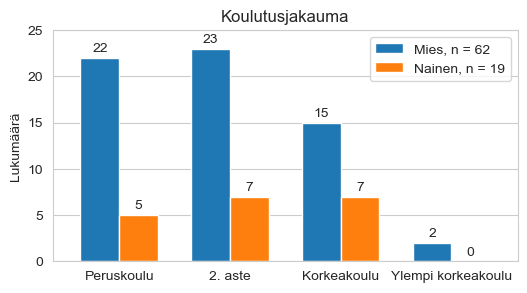

In [7]:
ax = df1.plot(kind='bar', figsize=(6, 3), rot=0, width=0.7)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')
plt.grid(axis='x')
plt.ylim(0, 25)

for container in ax.containers:
    ax.bar_label(container, padding=2)

### Pinottu (stacked) pylväskaavio

Pinottu pylväskaavio (`stacked=True`) näyttää arvosarjat samassa pylväässä, jolloin kokonaismäärä on helposti nähtävissä pylvään kokonaispituutena.

- Jos pinottujen pylväiden päälle halutaan lisätä lukuarvot, niin yksi tapa on käyttää **patches**-kokoelmaa, joka sisältää pylvään osia kuvaavat suorakulmiot.
- Suorakulmion mitat saan **get_bbox**-funktiolla.
- Jos suorakulmion leveys on 0 (esimerkissä ylemmän korkeakoulun kohdalla ei ole naisia), niin lukuarvoa ei pidä merkitä kaavioon (`if width > 0`).
- Lukuarvo muotoillaan esitettäväksi ilman desimaaleja ja muotoiltu luku sijoitetaan muuttujan **label** arvoksi.
- **plt.text**-funktion parametreilla säädetään tarkasti lukuarvon sijainti sekä keskitys vaaka- ja pystysuunnassa.

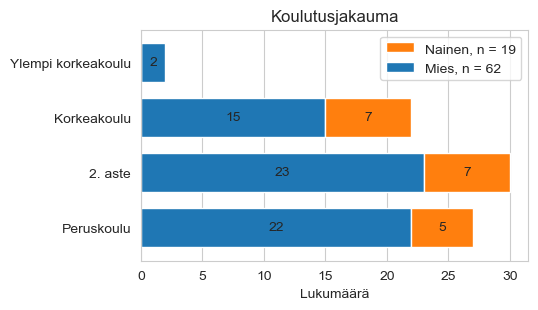

In [8]:
ax = df1.plot(kind='barh', figsize=(5, 3), legend='reverse', stacked=True, width=0.7)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width > 0:
        label = '{:.0f}'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

### Prosentit pinottuna (stacked) pylväskaaviona

Lasketaan ensin prosentit sisältävä taulukko.

In [9]:
df2 = pd.crosstab(df['sukup'], df['koulutus'], normalize='index')*100

df2.index = sukup
df2.columns = koulutus
df2

,Peruskoulu,2. aste,Korkeakoulu,Ylempi korkeakoulu
"Mies, n = 62",35.483871,37.096774,24.193548,3.225806
"Nainen, n = 19",26.315789,36.842105,36.842105,0.000000


Selite ei aina automaattisesti osu mieleiseen paikkaan. Seuraavassa säädetään selitettä **legend**-funktiolla:
* **ncol**-parametrilla lisätään selitteen sarakkeiden määräksi 4, jolloin koulutukset sijoittuvat vierekkäin.
* Muutamien kokeilujen jälkeen päädyin sijoittamaan selitteen sijaintiin (-0.1, -0.3). Koordinaatiston (0, 0) on kaavion vasemmassa alakulmassa ja (1, 1) on kaavion oikeassa yläkulmassa.
* Lue lisää selitteen muotoilusta: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html.
* Korkeakoulun suorittaneiden miesten lukuarvo on jätetty tilan puutteen takia pois (ìf width>4`).

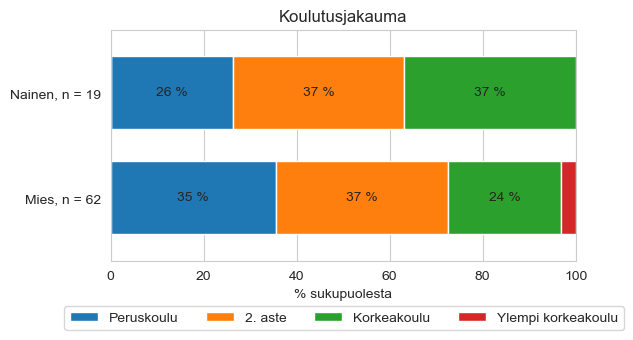

In [10]:
ax = df2.plot(kind='barh', figsize=(6,3), stacked=True, width=0.7)

plt.title('Koulutusjakauma')
plt.xlabel('% sukupuolesta')
plt.grid(axis='y')
plt.xlim(0, 100)
plt.legend(loc=(-0.1, -0.3), ncol=4)

for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width>4:
        label = '{:.0f} %'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')        

### Lisätietoa

Seuraavassa osassa 3/7 opit laatimaan kahden arvoakselin kaavion:

- [Kahden arvoakselin kaavio](https://github.com/taanila/kaaviot/blob/master/matplotlib3.ipynb)

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.